In [42]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from fractions import Fraction

np.set_printoptions(suppress=True, linewidth=200, precision=5)

**Opgave 1**

In [43]:
# find s ved brug af ligning 9.4

v = np.array([3, -1, 8])[:, np.newaxis]

s = 2 / np.vdot(v, v)
print(Fraction(s).limit_denominator())

1/37


**Opgave 2**

Her er det oplagt at forsøge, at løse ligningssystemet ved hjælp af Gauss-elimination og se, hvilket svarmulighed passer bedst. Vi kan prøve at løse systemet med a = 1 og a = 2 henholdsvis. Vi starter med a = 1:
$$
x + y + 3 = 5 \\
2x + 4y + 18 = 10
$$
$$
x + y = 2 \\
2x + 4y = -8
$$
$$
x = 2 - y
4 - 2y + 4y = -8
$$
$$
x = 2 - y
2y = -12
$$
$$
x = 8
y = -6
$$
Vi får også en løsning til a = 2, dvs. det giver anledning til at antage, at den er konsistent for alle a.

**Opgave 3**

Her tales der om kerne og billedmængde:
$$
\begin{bmatrix}
1.0 & 0 & 0 & 0.6 \\
0 & 0 & 1.0 & -0.4
\end{bmatrix}
$$
$$
x_0 + 0.6x_3 = 0 \\
x_2 - 0.4x_3 = 0
$$
$$
\begin{bmatrix}
x_0 \\
x_1 \\
x_2 \\
x_3 
\end{bmatrix} =
\begin{bmatrix}
-0.6x_3 \\
x_1 \\
0.4x_3 \\
x_3
\end{bmatrix} =
x_3 \begin{bmatrix}
-0.6 \\
0 \\
0.4 \\
1
\end{bmatrix}
x_1 \begin{bmatrix}
0 \\
1 \\
0 \\
0
\end{bmatrix}
$$
Her har vi simpelthen fundet nulrummet, fordi eksempel 18.22 påstår at ker L er det samme som nulrummet. For at finde nulrummet har vi omdannet matricen, som man kan "bygge" ved at kigge på højre siden af ligningen, til en reduced row echelonform. Derefter har vi løst ligningssystemet, som man gør for et nulrum. Løsningen af dette er svaret til opgaven.

**Opgave 4**

In [44]:
# Bestem hvor mange flops den bruger

def back_subs(r, c):
    n, _ = r.shape
    x = np.empty((n, 1))
    for i in reversed(range(n)):
        x[i] = (c[i] - r[[i], i+1:] @ x[i+1:]) / r[i, i]
        return x

Det er vigtigt, at kigge på dimensionen, hvis man beregner flops. Vi har en vektor med dimension $R^{5}$ og en matrix med dimension $R^{5 \times 5}$. Dog har vi det ikke hele tiden i vores metode ovenfor. Første gennemgang af loopen er n = 0. I den næste er det n = 1 og så op til 4. I loopen har vi først en differens (subtraction), så et række-søjleprodukt (bemærk at vi ganger to vektorer - r[[i], i+1:] er kun en søjle af matricen og c og x er begge også kun en søjle) og til sidst en division (kvotient). Dvs. har 5 gange alle tre operationer, så differens = 5, kvotient = 5. Række-søjleproduktet afhænger af dimensionen, som jo skiftes i hver gennemgang. Derfor vil det være $2 \cdot (0 + 1 + 2 + 3 + 4 + 5) = 20$. I alt har vi altså 30 flops.

**Opgave 5**

In [45]:
# Script til ortogonalitet (Referer til afsnit 8.1 om ortogonalitet)

import numpy as np
from sympy import Matrix

def is_orthogonal(vectors):
    # Konverter array til NumPy array
    vectors = np.array(vectors)
    
    # Beregn indre produkt af alle vektor par
    dot_products = np.dot(vectors, vectors.T)
    
    # Lav et SymPy array fra dot produkt matricen
    mat = Matrix(dot_products)
    
    # Tjek om matricen er diagonal (alle ikke-diagonaler er 0)
    if mat.is_diagonal():
        return True
    else:
        return False

# Vektorene. HUSK: Man skal indgive dem sidelængs, altså fra venstre til højre ikke oppefra og ned
vectors = [
    [-4, 2, 1, 0],
    [1, 2, 0, -4],
    [0, 2, -4, 1],
]

result = is_orthogonal(vectors)
print(result)  # Output: True

True


In [46]:
# Script til længden af vektorer (Referer til 8.2 om 2-normen (siges at være længden))

import numpy as np

def calculate_vector_lengths(vectors):
    # Konverter vektorene til et NumPy array
    vectors = np.array(vectors)
    
    # Beregn længden af hver vektor
    lengths = np.linalg.norm(vectors, axis=1)
    
    return lengths

# Vektorene. HUSK: Man skal indgive dem sidelængs, altså fra venstre til højre ikke oppefra og ned
vectors = [
    [-4, 2, 1, 0],
    [1, 2, 0, -4],
    [0, 2, -4, 1],
]

lengths = calculate_vector_lengths(vectors)
print(lengths)  # Output: [3.74165739 8.77496439 13.92838828]


[4.58258 4.58258 4.58258]


Ovenfor har vi, at vores samling er ortogonal og deres længde er allesammen 4.58258. Man kunne også argumentere med deres vinkler, som man kan beregne med følgende kode:

In [131]:
u_0 = np.array([-4, 2, 1, 0])
u_1 = np.array([1, 2, 0, -4])
u_2 = np.array([0, 2, -4, 1])

# Vinkel mellem vektor u_0 og u_2 findes med cos(theta)

cos_theta = ( np.dot(u_0, u_2) / (np.linalg.norm(u_0) * np.linalg.norm(u_2)))
# Angives i radianer
theta = np.arccos(cos_theta)

# Brug np.degrees(theta) hvis det skal angives i grader

print(np.degrees(theta))

90.0


In [55]:
# Script til at beregne projektion... forhåbentligt (Referer til 13.3 i notesæt)

# delopgave c)

import numpy as np

# Define the vectors
v0 = np.array([-4., 2., 1., 0.])
v1 = np.array([1., 2., 0., -4.])
v2 = np.array([0., 2., -4., 1.])
w = np.array([0., 1., 0., 0.])

# Calculate the projection Pw
Pw = np.zeros_like(w)
for v in [v0, v1, v2]:
    Pw += np.dot(w, v) / np.dot(v, v) * v
print("Projection Pw:", Pw)

v3 = w - Pw

print("v3:", v3)

# Verify orthogonality with v0, v1, v2
vectors = [v0, v1, v2]

for v in vectors:
    dot_product = np.dot(v3, v)
    if np.isclose(dot_product, 0):
        print(f"v3 is orthogonal to v: {v}")
    else:
        print(f"v3 is not orthogonal to v: {v}")

Projection Pw: [-0.28571  0.57143 -0.28571 -0.28571]
v3: [0.28571 0.42857 0.28571 0.28571]
v3 is orthogonal to v: [-4.  2.  1.  0.]
v3 is orthogonal to v: [ 1.  2.  0. -4.]
v3 is orthogonal to v: [ 0.  2. -4.  1.]


Vi ser, at vores projektion er [-0.28571  0.57143 -0.28571 -0.28571] og at v_3 er ortogonale til alle de andre vektorer i samlingen. Her har vi brugt afsnit 8.1 og def 13.3 til at løse opgaven, hvor man bruger formlen for projektion og indre produkt til beregninger.

In [81]:
# delopgave d)

# n er hvor mange søjler man har - 1

x = np.array([1., 2., 3., 4.])[:, np.newaxis]

matrix = np.array([[-4., 1., 0., 0.28571],
                   [2., 2., 2., 0.42857],
                   [1., 0., -4., 0.28571],
                   [0., -4., 1., 0.28571]])

n = matrix.shape[1]  # Get the number of columns in the matrix

def linKombination(matrix, x):
    res = np.dot(x.T, matrix) / np.linalg.norm(matrix, axis=0)**2
    return res

result = linKombination(matrix, x)
result = np.squeeze(result)  # Remove any singleton dimensions

print(result)

[ 0.14286 -0.52381 -0.19048  7.33339]


Her har vi brugt formlen $\langle u, v \rangle / ||v_i||_2^2$ til at finde den lineære kombination. Resultatet er $a_0 = 0.14286, a_1 = -0.52381, a_2 = -0.19048, a_3 = 7.33339$.

**Opgave 6**

In [82]:
# delopgave a)

x = [-0.31, -0.15, -0.12, 0.01, 0.21, 0.33, 0.45]
y = [7.1, 4.2, 2.1, 3.7, 3.2, 1.9, 0.5]

A = np.vander(x, 4)

U, s, Vt = np.linalg.svd(A, full_matrices=False)
S_inv = np.diag(1 / s)
pseudo_inv = np.dot(Vt.T, np.dot(S_inv, U.T))
koefficient = np.dot(pseudo_inv, y)

print(koefficient)

[-70.81832  19.3505   -0.26823   2.93444]


Her bruger vi SVD til at finde U, s og Vt, som vi bagefter bruger til at finde den pseudo-inverse. Med den pseudo-inverse kan vi så finde x, som vist i ligning 16.5 i noterne. Det er løsningen til mindste-kvadraters metode.

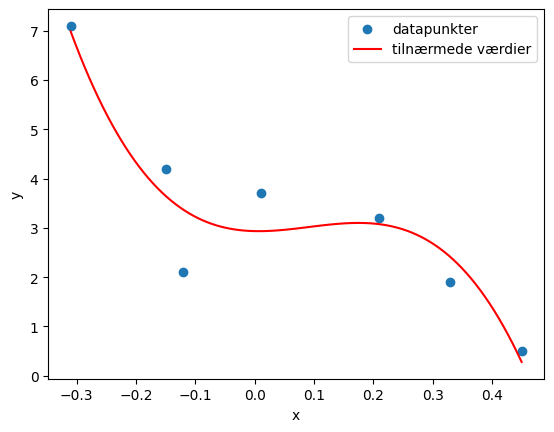

In [83]:
# delopgave b)

values = np.linspace(min(x), max(x), 100)
new_A = np.vander(values, 4)
plot = np.dot(new_A, koefficient)

plt.scatter(x, y, label='datapunkter')
plt.plot(values, plot, color='red', label='tilnærmede værdier')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Her har vi plottet polynomiet, hvor der kan ses at den største afvigelse i (r, b) er i datapunkt 2, altså (-0.12, 2.1).

In [91]:
# delopgave c)

B = np.vander(x, 7)

U, s, Vt = np.linalg.svd(B, full_matrices=False)
s

array([2.65785, 0.69343, 0.14193, 0.03302, 0.0051 , 0.00072, 0.00004])

Her har vi meget simpelt bare brugt np.vander(x, 7), fordi vi nu har et 6-grads polynomie i stedet for et tredje-grads polynomie. Derefter laver vi igen SVD og printer s, som er singulærværdierne for det nye polynomie B.

**Opgave 7**

delopgave a) $\\$
Vi har matricen:
$$
A = \begin{bmatrix}
    6 & 3 & -1 \\
    0 & -2 & 1 \\
    0 & 0 & 1
\end{bmatrix}
$$
Efter indsættelse af $\lambda_0 = 6, \lambda_1 = 1, \lambda_2 = -2$ har vi følgende tre matricer:
$$
\lambda_0 = \begin{bmatrix}
0 & 3 & -1 \\
0 & -8 & 1 \\
0 & 0 & -5
\end{bmatrix},
\lambda_1 = \begin{bmatrix}
5 & 3 & -1 \\
0 & -3 & 1 \\
0 & 0 & 0
\end{bmatrix},
\lambda_2 = \begin{bmatrix}
8 & 3 & -1 \\
0 & 0 & 1 \\
0 & 0 & 3
\end{bmatrix}
$$
Så reducerer vi dem til row echelonform:
$$
\lambda_0 = \begin{bmatrix}0 & 0 & 0\\0 & 1.0 & 0\\0 & 0 & 1.0\end{bmatrix},
\lambda_1 = \begin{bmatrix}1.0 & 0 & 0\\0 & 1.0 & -0.333333333333333\\0 & 0 & 0\end{bmatrix},
\lambda_2 = \begin{bmatrix}1.0 & 0.375 & 0\\0 & 0 & 0\\0 & 0 & 1.0\end{bmatrix}
$$
Vi kan se, at alle tre echelonform matricer har to pivot søjler (på grund af to pivot elementer), som betyder, at det er egenværdier der er tale om. Vi kan finde egenvektorerne ved at sætte ovesntående matricer lig med 0:
$$
0 = 0 \\
x_1 = 0 \\
x_2 = 0
$$
Her ser vi, at $x_0$ er en fri variabel, så vi kan antage dens værdi, som antager for at være 1:
$$
\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}
$$
er egenvektoren for $\lambda_0$. Næste har
$$
x_0 = 0 \\
x_1 - 1/3x_2 = 0 \\
0 = 0
$$
Her ser vi, at x_2 er en fri variabel, så vi antager dens værdi for at være 3, dvs:
$$
\begin{bmatrix}
0 \\
1 \\
3
\end{bmatrix}
$$
som er egenvektoren for $\lambda_1$. Den sidste har:
$$
x_0 + 0.375x_1 = 0 \\
0 = 0 \\
x_2 = 1
$$
Vi ser, at $x_1$ er fri og antager dens værdi for at være -8 (af fordele):
$$
\begin{bmatrix}
3 \\
-8 \\
0
\end{bmatrix}
$$
som er egenvektoren for $\lambda_2$.

delopgave b) $\\$
Her skal man finde c-værdierne således vi får vektoren (0, 1, 0). Det viser sig, at man skal hstack vektoren på matricen dannet af de tre egenvektorer og så finde row echelonformen. Den sidste linje i row echelonform er så løsningerne til c. Her er matricen i row echelonform:
$$
\begin{bmatrix}
1.0 & 0 & 0 & 0.375 \\
0 & 1.0 & 0 & 0 \\
0 & 0 & 1.0 & -0.125
\end{bmatrix}
$$
Her ser vi så, at $c_0 = 0.375, c_1 = 0, c_2 = -0.125$. Hele denne proces bliver beskrevet i eksempel 22.3 ved hjælp af prop 22.2. Nu har vi fundet c-værdierne i tid 0, men vi skal også finde dem i tid t. Dvs:
$$
\begin{bmatrix}
3/8 \cdot e^{6t} \\
0\\
-1/8 \cdot e^{-2t}
\end{bmatrix}
$$
som vi nu kan plotte:

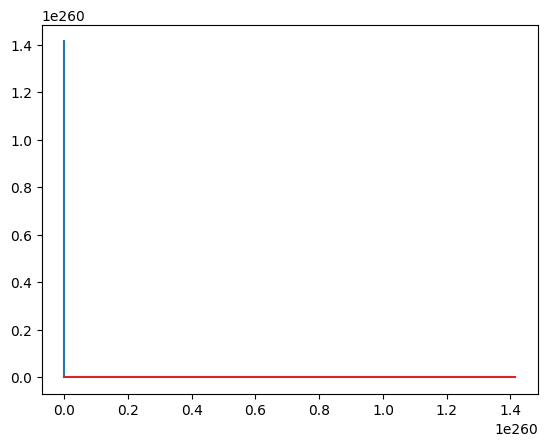

In [121]:
# plot

t = np.linspace(0, 100, 100)

v0 = np.array([1, 0, 0])[:, np.newaxis]
v1 = np.array([0, 1, 3])[:, np.newaxis]
v2 = np.array([3, -8, 0])[:, np.newaxis]

c0 = 3/8
c1 = 0
c2 = -1/8

function = (c0 * v0 * np.exp(6*t) + c1 * v1 * np.exp(1 * t) + c2 * v2 * np.exp(-2*t))

fig, ax = plt.subplots()
ax.plot(t, function[0, :], label = 'y0 towards t')
ax.plot(t, function[1, :], label = 'y1 towards t')
ax.plot(t, function[2, :], label = 'y2 towards t')
ax.plot(*function, label='y0 towards t')
plt.show()

# Denne opgave er slet ikke løsbart. Ikke negang andrew fandt frem til en løsning som man forstår. Han må 100p have været fuld, da han skrev opgaven og løsningen til den.

In [129]:
# delopgave c)

a = np.array([[6, 3, 1], 
              [0, -2, 1], 
              [0, 0, 1]])

def inv_potens_skridt(a, w, mu):
    m, _ = a.shape
    v = np.linalg.solve(a - mu * np.eye(m), w)
    v /= np.linalg.norm(v)
    lambda_ny = np.vdot(v, a @ v)
    return lambda_ny, v

mu = 5.5

rng = np.random.default_rng()

m, _ = a.shape
w = rng.standard_normal((m, 1))
w /= np.linalg.norm(w)

n = 20
lambda_out = np.empty(n)

for i in range(n):
    lambda_out[i], w = inv_potens_skridt(a, w, mu)

print(lambda_out)

[5.11237 6.05892 5.9943  6.00055 5.99994 6.00001 6.      6.      6.      6.      6.      6.      6.      6.      6.      6.      6.      6.      6.      6.     ]


Vi kan se, at den største værdi af sigma er 6.

In [130]:
np.linalg.svd(a)

(array([[ 0.99273, -0.1085 , -0.05205],
        [-0.11881, -0.95251, -0.28037],
        [ 0.01916, -0.28452,  0.95848]]),
 array([6.82771, 2.17466, 0.80819]),
 array([[ 0.87238,  0.47099,  0.1308 ],
        [-0.29937,  0.72633, -0.61873],
        [-0.38642,  0.50062,  0.77464]]))

I svd er den største værdi 6.82, som er lidt større end den vi får med invers potensmetoden, så den er ikke helt præcis.